In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer

In [3]:
data = pd.read_csv("ola_driver_scaler.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
data.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [5]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [7]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [8]:
data["LastWorkingDate"].value_counts().head(100)

LastWorkingDate
29/07/20    70
22/09/19    26
17/03/19    14
28/11/20    13
17/02/20    13
            ..
06/07/20     5
24/03/20     5
15/09/20     5
06/03/19     5
01/05/19     5
Name: count, Length: 100, dtype: int64

In [9]:
data["LastWorkingDate"].isnull()

0         True
1         True
2        False
3         True
4         True
         ...  
19099     True
19100     True
19101     True
19102     True
19103     True
Name: LastWorkingDate, Length: 19104, dtype: bool

In [10]:
data.loc[data.duplicated()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


In [11]:
# Check for duplicate trip uuid
data.loc[data.duplicated(subset=['Driver_ID'])].head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1


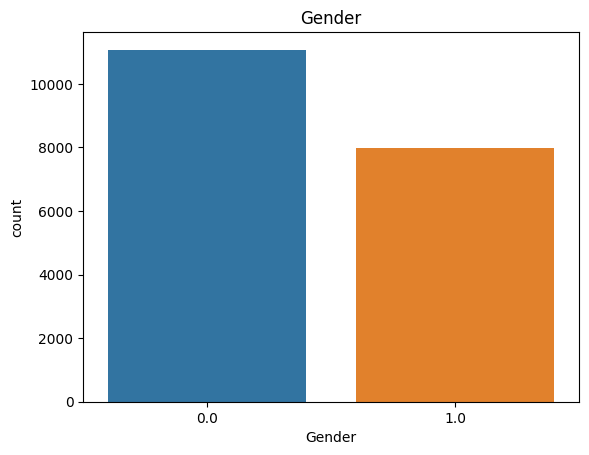

In [12]:
# Explore the distribution of categorical variables
sns.countplot(x='Gender', data=data)
plt.title('Gender')
plt.show()

In [13]:
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
data

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_4072\3004307827.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [14]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_4072\2085316698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaN,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaN,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaN,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaN,2,2,200420,2


In [15]:
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])
data

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_4072\1495528837.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [16]:
data.groupby(['Driver_ID'])["Income"].count().sort_values()

Driver_ID
1978     1
148      1
540      1
2281     1
561      1
        ..
1446    24
2027    24
2028    24
2494    24
2259    24
Name: Income, Length: 2381, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [18]:
data[data["Driver_ID"] == 2]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [19]:
data[data["Gender"].isnull()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
240,2019-02-01,43,27.0,NaN,C15,0,12906,2018-07-13,2019-02-20,1,1,0,1
258,2019-02-01,49,21.0,NaN,C20,0,53039,2018-05-25,NaT,1,2,0,1
264,2019-08-01,49,21.0,NaN,C20,0,53039,2018-05-25,NaT,1,2,300300,2
466,2019-08-01,68,31.0,NaN,C29,0,79288,2015-10-18,NaT,1,3,544930,3
820,2019-02-01,116,21.0,NaN,C11,0,16477,2018-12-04,NaT,1,1,129590,1
859,2019-11-01,119,31.0,NaN,C29,1,71000,2019-11-16,NaT,3,3,0,1
1514,2020-12-01,225,32.0,NaN,C14,0,44792,2020-07-13,NaT,3,3,337020,3
1892,2019-08-01,296,31.0,NaN,C20,1,65094,2018-06-10,NaT,1,2,145670,2
2277,2019-02-01,354,31.0,NaN,C11,0,60555,2018-11-30,NaT,1,1,0,1
2359,2020-03-01,365,24.0,NaN,C22,0,44740,2020-02-01,NaT,2,2,0,1


In [20]:
data[(data["Driver_ID"] == 4)]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1


In [21]:
def update_gender(data):
    # create an object for KNNImputer
    imputer = KNNImputer(n_neighbors=2)
    data[["Gender","Age"]] = imputer.fit_transform(data[["Gender","Age"]])
    return data


In [22]:
data = data.groupby(['Driver_ID']).apply(update_gender).reset_index(drop=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [24]:
data[["Driver_ID","Age"]]

,Driver_ID,Age
0,1,28.0
1,1,28.0
2,1,28.0
3,2,31.0
4,2,31.0
...,...,...
19099,2788,30.0
19100,2788,30.0
19101,2788,30.0
19102,2788,30.0


In [25]:
data.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [27]:
def udpate_lwd(data):
    #print(type(data))
    non_nan_values = data["LastWorkingDate"].dropna().unique()
    #print(non_nan_values)
    if len(non_nan_values) > 0:
       non_nan_value = non_nan_values[0]
       data["LastWorkingDate"].fillna(non_nan_value, inplace=True)
    
    return data
    

In [28]:
data = data.groupby(['Driver_ID']).apply(udpate_lwd).reset_index(drop=True)
data

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [31]:
data['Quarterly Rating Increased'] =  data.groupby('Driver_ID')['Quarterly Rating'].transform(pd.Series.diff) > 0

In [32]:
data[data['Quarterly Rating Increased'] == True]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased
15,2020-10-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,2,True
31,2019-04-01,13,29.0,0.0,C19,2,119227,2015-05-28,2020-11-25,1,4,250000,2,True
91,2019-04-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,601680,4,True
110,2019-07-01,24,30.5,0.0,C24,2,76308,2018-05-25,2019-10-27,1,2,203240,3,True
117,2019-04-01,25,29.0,0.0,C24,1,102077,2017-10-30,NaT,1,3,1030790,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19042,2020-04-01,2781,25.0,0.0,C23,2,46952,2020-02-17,NaT,2,2,451540,4,True
19048,2020-10-01,2781,25.0,0.0,C23,2,46952,2020-02-17,NaT,2,2,447800,4,True
19064,2019-10-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,990000,3,True
19076,2020-10-01,2784,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,3087830,4,True


In [38]:
data[data["Driver_ID"] == 22]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased,target,Monthly Income Increased
88,2019-01-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,216170,2,False,1,False
89,2019-02-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,404600,2,False,1,False
90,2019-03-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,819960,2,False,1,False
91,2019-04-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,601680,4,True,1,False
92,2019-05-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,635700,4,False,1,False
93,2019-06-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,121590,4,False,1,False
94,2019-07-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,653680,4,False,1,False
95,2019-08-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,1120560,4,False,1,False
96,2019-09-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,696920,4,False,1,False
97,2019-10-01,22,40.0,0.0,C10,2,31224,2018-05-25,2020-04-26,1,1,200000,3,False,1,False


In [34]:
data['target'] = np.where(data['LastWorkingDate'].isna(), 0, 1)

In [37]:
data['Monthly Income Increased'] = data.groupby('Driver_ID')['Income'].transform(pd.Series.diff) > 0

In [39]:
data[data['Monthly Income Increased'] == True]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased,target,Monthly Income Increased
152,2020-03-01,26,42.0,0.0,C14,2,132577,2018-05-07,NaT,1,4,9226690,4,True,0,True
299,2020-06-01,54,34.0,0.0,C29,1,127826,2019-07-11,NaT,4,5,1449260,3,True,0,True
376,2020-07-01,60,47.0,1.0,C20,0,89592,2016-09-17,NaT,1,4,2887190,4,False,0,True
682,2020-10-01,98,25.0,0.0,C16,0,63774,2019-08-15,2020-12-25,2,3,971130,2,True,1,True
1795,2020-07-01,275,41.0,0.0,C20,0,97226,2016-05-02,NaT,1,4,849710,1,False,0,True
1951,2020-10-01,307,39.0,0.0,C26,0,88207,2018-10-05,2020-10-26,2,4,500050,1,False,1,True
2035,2020-07-01,320,28.0,1.0,C20,0,63126,2018-07-13,NaT,1,2,871770,4,False,0,True
2385,2020-10-01,368,45.0,0.0,C23,1,51911,2018-09-18,NaT,1,2,940080,4,False,0,True
2899,2020-07-01,434,29.0,1.0,C6,2,88515,2017-08-11,NaT,1,3,1250460,4,False,0,True
3595,2020-10-01,537,35.0,1.0,C29,1,84554,2019-12-06,NaT,2,3,627030,4,False,0,True


In [46]:
data[data["Driver_ID"] == 1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased,target,Monthly Income Increased,Increased_Rating,Increased_Income
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,2381060,2,False,1,False,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,-665480,2,False,1,False,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,False,1,False,0,0


In [41]:
data['Increased_Rating'] = (data['Quarterly Rating'] > data.groupby('Driver_ID')['Quarterly Rating'].shift(1)) * 1

In [44]:
data['Increased_Income'] = (data['Income'] > data.groupby('Driver_ID')['Income'].shift(1)) * 1

In [29]:
merged_data = df.groupby(['Driver_ID']).agg({
   'Age': 'first',
    'Gender': 'first',
    'City': 'first'
})

NameError: name 'df' is not defined

In [ ]:
numerical_cols = ['Age', 'Income', 'Total Business Value']
plt.figure(figsize=(12, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize other relationships using scatter plots, box plots, etc.
# For example:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=data, hue='Gender')
plt.title('Age vs Income')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
 
 
# create dataset for marks of a student
dict = {'Maths':[80, 90, np.nan, 95], 
        'Chemistry': [60, 65, 56, np.nan], 
        'Physics':[np.nan, 57, 80, 78],
       'Biology' : [78,83,67,np.nan]}
 
# creating a data frame from the list 
Before_imputation = pd.DataFrame(dict)
#print dataset before imputation
print("Data Before performing imputation\n",Before_imputation)
 
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=1)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=3)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)